## Lead Score - Case Study


## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Goals and Objectives
This case study has several objectives.

 - Assign each of the leads a lead score between 0 and 100 using a logistic regression model, which the business may use to target potential leads. In contrast, a lower number would indicate that the lead is cold and unlikely to convert, while a higher score would indicate that the lead is hot and most likely to convert.
 - There are certain other challenges provided by the firm that our model should be able to respond to if the company's requirements alter in the future, so we need to manage them as well. These problems are provided in a separate document file. we need to fill it based on the logistic regression model we got in the first step. Also, need to make sure that we include this in our final PPT where we'll make recommendations.

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
%matplotlib inline

# Data display customization
pd.set_option('display.max_rows', 143)
pd.set_option('display.max_columns', 143)


#importing sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

## Step 1 - Reading and Understanding the Data

In [2]:
#Import the dataset
leads_data = pd.read_csv("/Users/meghanachinta/Documents/PGD/02 Machine Learning - I/Lead Scoring Assignment/Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#check the shape of dataframe
leads_data.shape

(9240, 37)

In [4]:
#inspect the dataframe
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [5]:
#check the statistics of dataframe
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#check null values in each column in dataframe
leads_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [7]:
# Duplicate check

leads_data.loc[leads_data.duplicated()]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [8]:
#check the original Conversion Rate
Initial_Conversion_rate = round((sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100, 2)
print("The conversion rate of leads is ",Initial_Conversion_rate)

The conversion rate of leads is  38.54


### Inferences

- #### The leads dataset has 37 columns and 9240 rows.
- #### 30 category categories and 7 numerical categories are present.
- #### The dataset has several 'Select' values spread over a number of columns. These numbers indicate that the user has not chosen anything.
- #### Many columns have null or missing values.
- #### The dataset contains no values that are duplicates.
- #### Lead conversion rate is 38.54%.

## Step 2 - Data Cleaning

In [9]:
#Since the customer did not choose any choices for these columns while entering the data, "Select" is being replaced with "NaN."

leads_data = leads_data.replace('Select',np.nan)

In [10]:
#Checking the No of distinct values in each column.

leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

### Inferences

 - #### As shown above, there are a few columns with only one unique value.
 
###### Get updates on DM Content

###### Update me on Supply Chain Content

###### I agree to pay the amount through cheque

###### Receive More Updates About Our Courses

###### Magazine

- #### We can remove these columns as they don't add anything to the model and have just one unique value each. 


In [11]:
#drop unique valued columns
leads_data= leads_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
#drop Prospect ID since they have all unique values

leads_data.drop(['Prospect ID'], 1, inplace = True)

In [13]:
# Finding the percentage of null values in each column

missing_values_percentage = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(missing_values_percentage)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

### Inferences

 - #### Few columns have missing data at a significant rate (greater than 45%), Where null values are greater than 45%, we will remove these columns.



In [14]:
leads_data.drop(columns=['Lead Profile','Lead Quality','How did you hear about X Education','Asymmetrique Activity Index', 'Asymmetrique Profile Index','Asymmetrique Activity Score', 'Asymmetrique Profile Score'],inplace=True)

In [15]:
# check for percentage of null values in each column after dropping columns having more than 45% null values

round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)


Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

### Inferences

 - #### Few columns still have a large percentage of null values, or more than 30%. Let's look at each of these columns separately to deal with the null values in each one.


In [16]:
#check City column

leads_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

In [17]:
leads_data.City.value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

### Inferences

 - #### Mumbai makes up around 58% of the data, therefore we may substitute "Mumbai" for the missing numbers.

In [18]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [19]:
leads_data.City.value_counts(normalize=True)

Mumbai                         0.745779
Thane & Outskirts              0.081385
Other Cities                   0.074242
Other Cities of Maharashtra    0.049459
Other Metro Cities             0.041126
Tier II Cities                 0.008009
Name: City, dtype: float64

In [20]:
#check Specialization column
leads_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

In [21]:
leads_data.Specialization.value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Travel and Tourism                   0.034642
Media and Advertising                0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

### Inferences

- #### Since NaN values have the largest percentage of values, we will replace the 36% null values with 'Others'.

- #### It's possible that the lead didn't indicate specialisation because it wasn't on the list or because they don't yet have one. 


In [22]:
leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan,'Others')

In [23]:
leads_data.Specialization.value_counts(normalize=True)

Others                               0.365801
Finance Management                   0.105628
Human Resource Management            0.091775
Marketing Management                 0.090693
Operations Management                0.054437
Business Administration              0.043615
IT Projects Management               0.039610
Supply Chain Management              0.037771
Banking, Investment And Insurance    0.036580
Travel and Tourism                   0.021970
Media and Advertising                0.021970
International Business               0.019264
Healthcare Management                0.017208
Hospitality Management               0.012338
E-COMMERCE                           0.012121
Retail Management                    0.010823
Rural and Agribusiness               0.007900
E-Business                           0.006169
Services Excellence                  0.004329
Name: Specialization, dtype: float64

In [24]:
#Check Tags column
leads_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

In [25]:
leads_data.Tags.value_counts(normalize=True)

Will revert after reading the email                  0.351962
Ringing                                              0.204349
Interested in other courses                          0.087141
Already a student                                    0.078988
Closed by Horizzon                                   0.060812
switched off                                         0.040768
Busy                                                 0.031595
Lost to EINS                                         0.029727
Not doing further education                          0.024631
Interested  in full time MBA                         0.019874
Graduation in progress                               0.018855
invalid number                                       0.014099
Diploma holder (Not Eligible)                        0.010702
wrong number given                                   0.007984
opp hangup                                           0.005606
number not provided                                  0.004586
in touch

### Inferences

 - #### "Will revert after reading the email" is tagged in 36% of the data in the Tags column, while 36% of the data are null values.
 
- #### These tags are added by the sales team at X Education, and they may change over time depending on what the sales staff understands.Thus, not very trustworthy, and we may discontinue this column.


In [26]:
#drop Tags column
leads_data = leads_data.drop('Tags', axis=1)

In [27]:
#check 'What matters most to you in choosing a course' column
leads_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

In [28]:
leads_data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

### Inferences

- #### The emphasis in this essay is firmly on improved job possibilities.As a result, we may remove this column because the majority of candidates who enrol in this course want to further their careers.

In [29]:
#drop 'What matters most to you in choosing a course' column
leads_data = leads_data.drop('What matters most to you in choosing a course', axis=1)

In [30]:
#check 'What is your current occupation' column
leads_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

In [31]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

### Inferences

 - #### We may impute the missing numbers with "Unemployed" because 85% of the data is unemployed.

In [32]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [33]:
leads_data['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.897186
Working Professional    0.076407
Student                 0.022727
Other                   0.001732
Housewife               0.001082
Businessman             0.000866
Name: What is your current occupation, dtype: float64

In [34]:
#check country column
leads_data['Country'].describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

In [35]:
leads_data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

### Inferences

 - #### 96% of the data are from India, while 27% of the data are missing. So, removing this column won't have an influence on the model.

In [36]:
#drop country column
leads_data = leads_data.drop('Country', axis=1)

In [37]:
# check for percentage of null values in each column 
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)


Lead Number                               0.00
Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Specialization                            0.00
What is your current occupation           0.00
Search                                    0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
City                                      0.00
A free copy of Mastering The Interview    0.00
Last Notable Activity                     0.00
dtype: float6

In [38]:
# Now missing values are under 2% so we can drop them.
leads_data.dropna(inplace = True)

In [39]:
# check for percentage of null values in each column 
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
City                                      0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

## Step 3 - Univariate Analysis and Bi-variate Analysis 

 - ### <u> Lead Origin

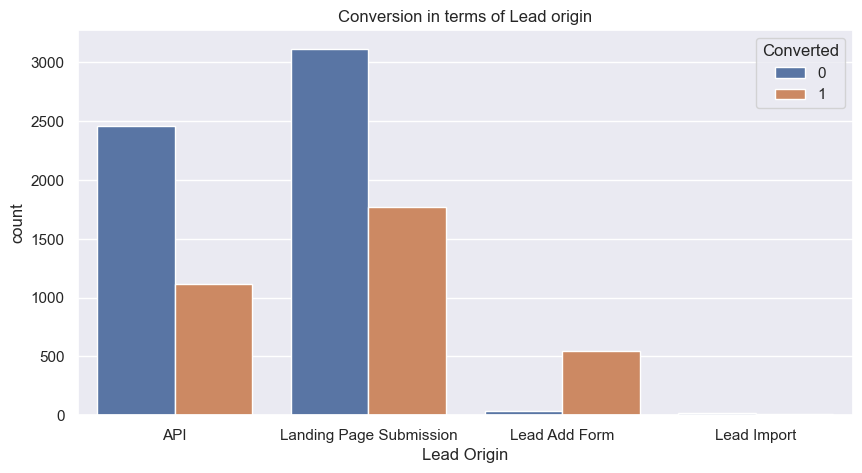

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x = "Lead Origin", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead origin")
plt.show()

In [41]:
#def function conversion summary
def conversion_summary(data,col):
    convert = data.pivot_table(values = 'Lead Number',index = col ,columns = 'Converted', aggfunc = 'count').fillna(0)
    convert["Conversion(%)"] =round(convert[1]/(convert[0]+convert[1]),2)*100
    print(convert.sort_values(ascending = False,by = "Conversion(%)"))

In [42]:
conversion_summary(leads_data,"Lead Origin")

Converted                   0     1  Conversion(%)
Lead Origin                                       
Lead Add Form              37   544           94.0
Landing Page Submission  3118  1767           36.0
API                      2463  1115           31.0
Lead Import                21     9           30.0


### Inferences
#### We may deduce the following from the plot description and Lead origin conversion shown above:

- #### The greatest conversion rate is 94% for Lead Add Form.

- #### Although they produce the most leads, API and Landing Page Submission have conversion rates of 31% and 36%, respectively.

- #### The least number of conversions and leads are generated through Lead Import.

- #### The lead conversion rate of API and Landing Page Submission should be improved in order to increase the total lead conversion rate. Additionally, create more leads with the Lead Add form as it has a high conversion rate.


 - ### <u> Lead Source

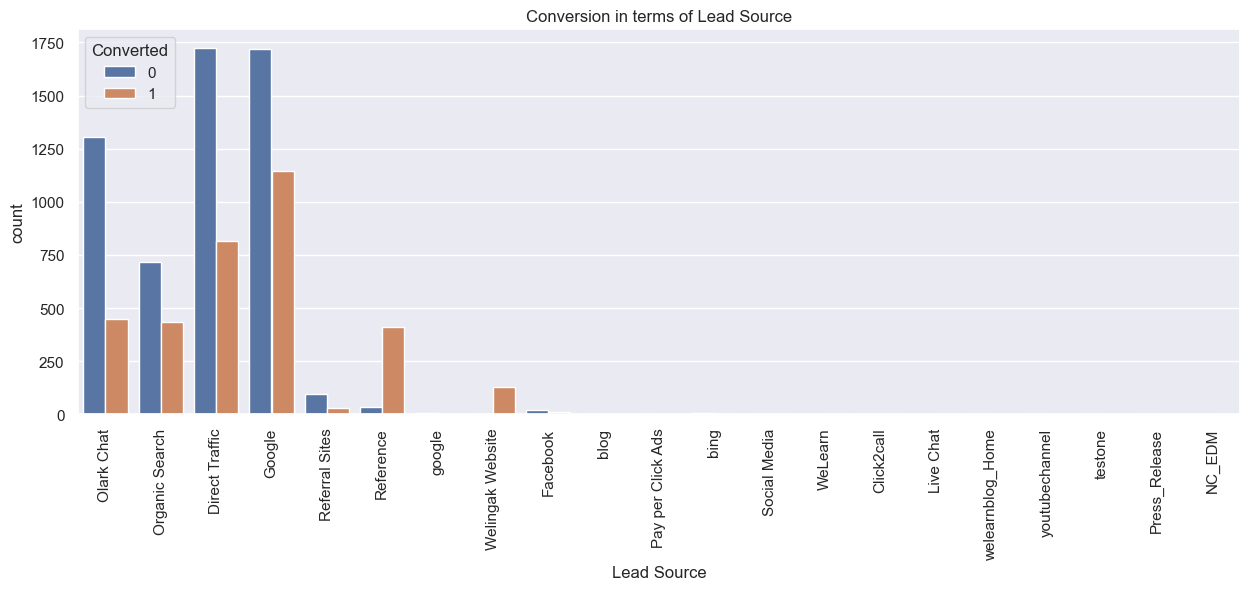

In [43]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

### Inferences

 - #### The number of Lead sources is relatively low.Therefore, we may group them together under the category "Others."
 
- #### Additionally, there are two categories that share the name Google.So, to have a single category, replace google with Google.




In [44]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['google'], 'Google')
leads_data['Lead Source'] = leads_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')

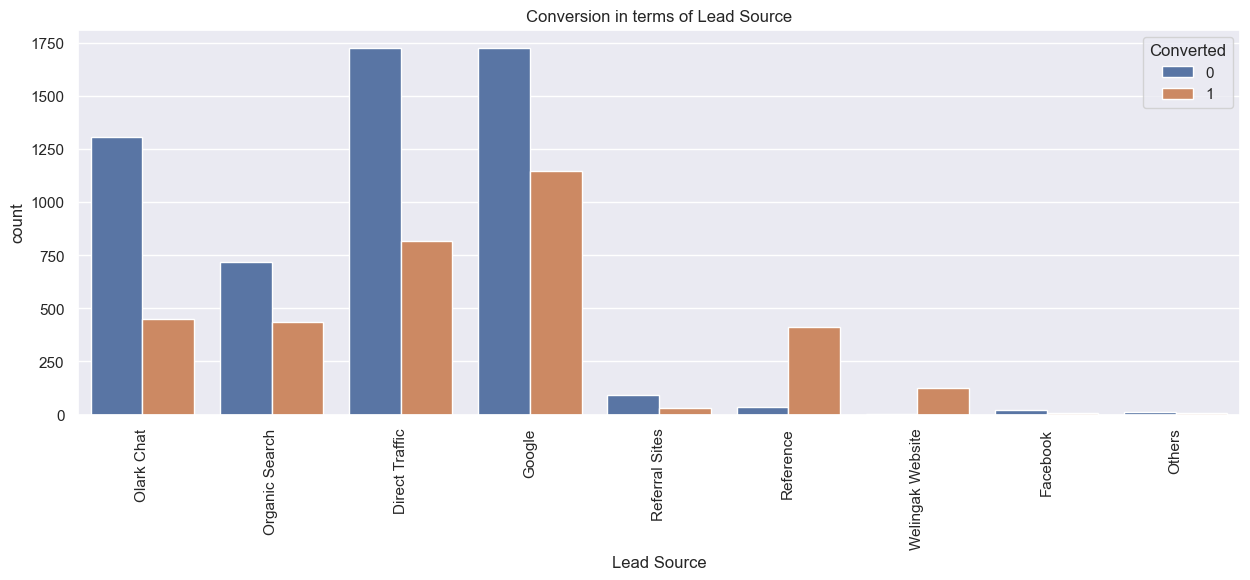

In [45]:
#generate the barplot again to check the distribution
plt.figure(figsize=(15,5))
sns.countplot(x = "Lead Source", hue = "Converted", data = leads_data)
plt.title("Conversion in terms of Lead Source")
plt.xticks(rotation=90)
plt.show()

In [46]:
conversion_summary(leads_data,"Lead Source")

Converted            0     1  Conversion(%)
Lead Source                                
Welingak Website     2   127           98.0
Reference           33   410           93.0
Google            1726  1147           40.0
Others              14     9           39.0
Organic Search     718   436           38.0
Direct Traffic    1725   818           32.0
Facebook            22     9           29.0
Olark Chat        1305   448           26.0
Referral Sites      94    31           25.0


### Inferences

#### We may deduce the following from the plot description and Lead origin conversion shown above:

 - #### The most leads are generated by Google and direct traffic, but their conversion rates are 40% and 32%, respectively.

 - #### Although the Welingak website and References have the best conversion rates, at 98% and 93%, respectively, they provide less leads.

 - #### Although they create a sizable amount of leads, olark chat and organic search only convert about 26% and 38% of those leads, respectively.

- #### Lead sources in the 'others' category, such as 'Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release', 'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', and 'youtubechannel', produce relatively few leads.

- #### The lead conversion of Google lead source, organic search, direct traffic, and Olark chat should be improved in order to increase total lead conversion rate.Additionally, since reference and Welingak websites have excellent conversion rates, create additional leads from them.

 

 - ### <u> Do Not Email & Do Not Call
    


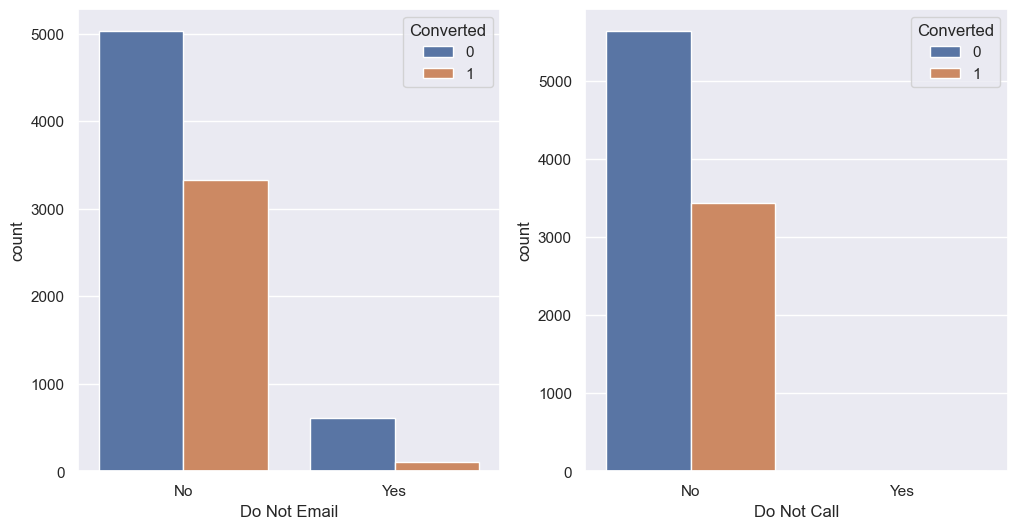

In [47]:
fig, axs = plt.subplots(1,2,figsize = (12,6))
sns.countplot(x = "Do Not Email", hue = "Converted", data = leads_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = leads_data, ax = axs[1])
plt.show()


In [48]:
conversion_summary(leads_data,"Do Not Email")


Converted        0     1  Conversion(%)
Do Not Email                           
No            5027  3331           40.0
Yes            612   104           15.0


In [49]:
conversion_summary(leads_data,"Do Not Call")

Converted         0       1  Conversion(%)
Do Not Call                               
Yes             0.0     2.0          100.0
No           5639.0  3433.0           38.0


### Inferences

#### We may deduce the following from the plot and conversion description above:

 - #### Approximately 99% of consumers dislike getting calls or emails regarding the course.


 - ### <u> Total Visits

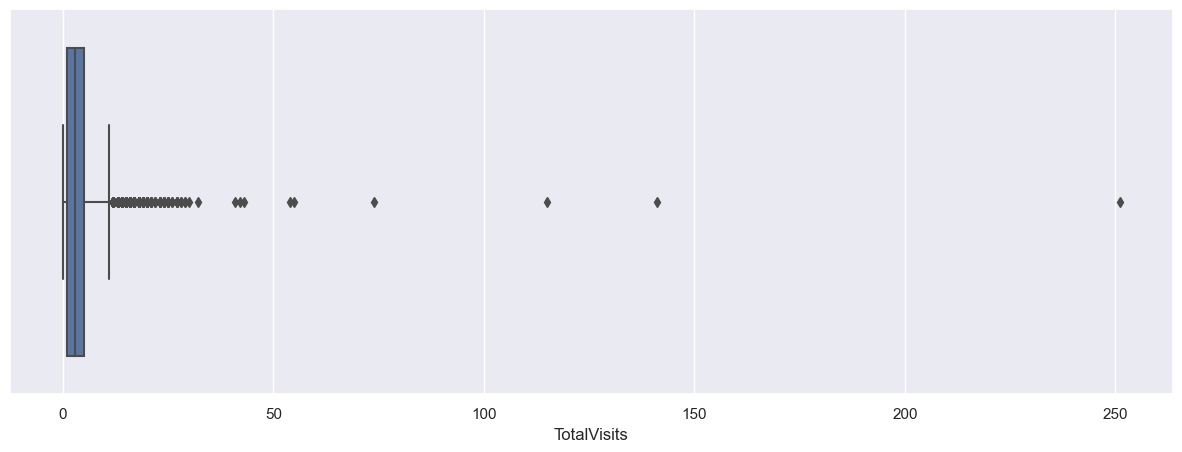

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_data['TotalVisits'])
plt.show()

### Inferences

#### A few outliers may be seen in the Total Visits column.The outliers will be capped at 95%.


In [51]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] <= percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

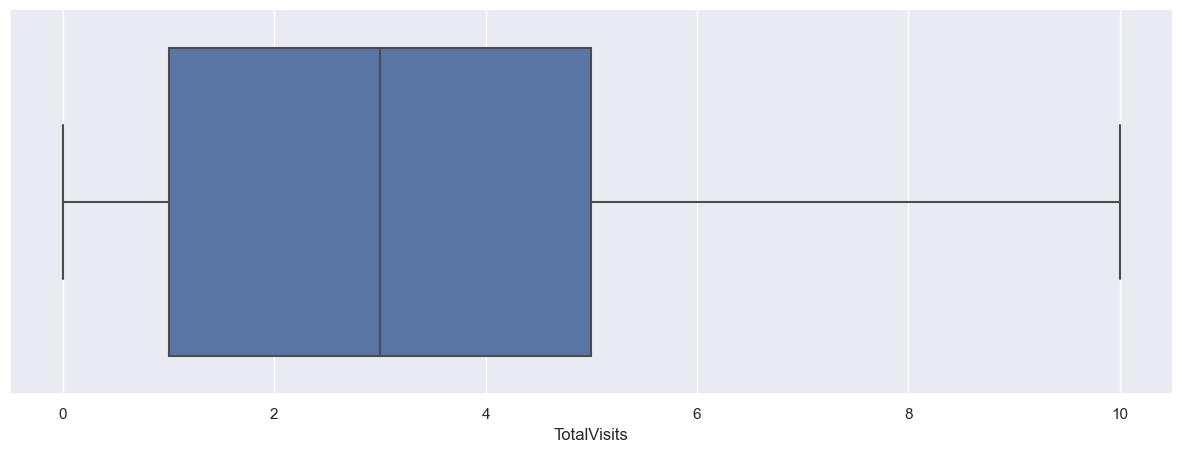

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(leads_data['TotalVisits'])
plt.show()

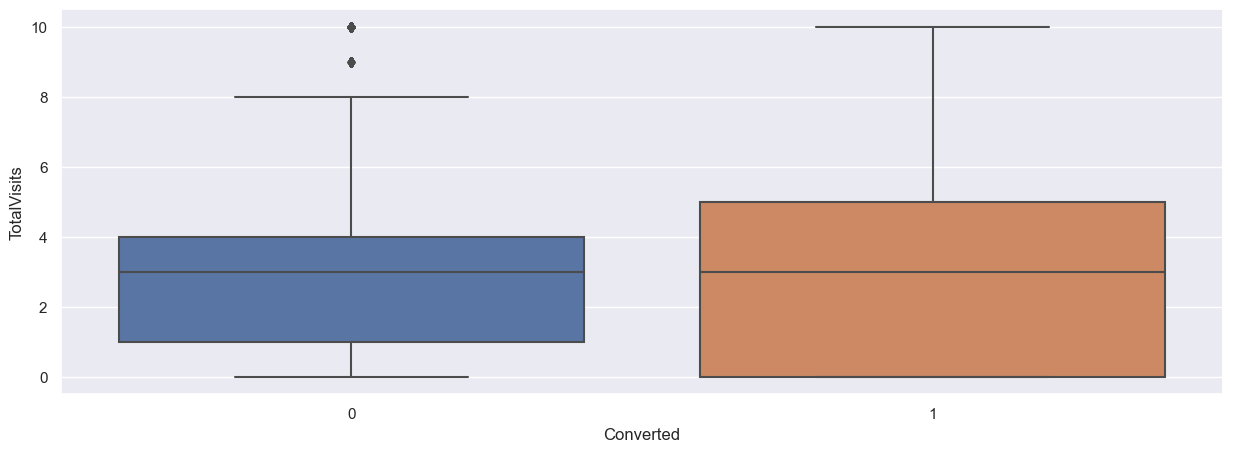

In [53]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.show()

### Inferences
#### From the boxplot shown above, it is clear that:

 - #### The median is the same for both converted and non-converted leads.
 
 - #### Everyone who accesses the site has a 50/50 probability of applying for the course or not.



 - ### <u> Total time spent on website

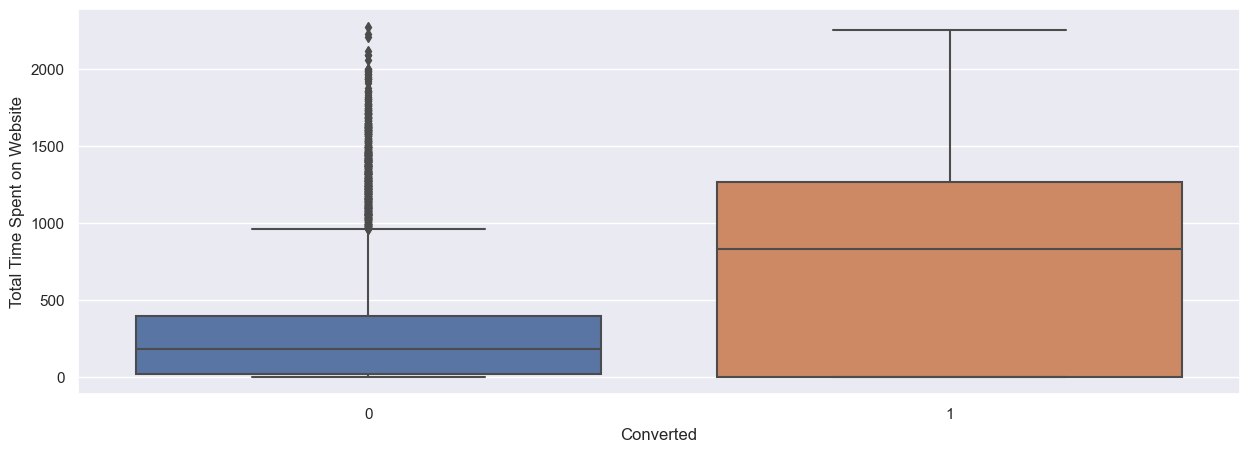

In [54]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.show()

### Inferences
#### From the boxplot shown above, it is clear that:

 - #### People who spend more time on websites are more likely to enrol in a course.
 
 - #### Less frequent website users didn't sign up for any courses.



 - ### <u> Page views per visit

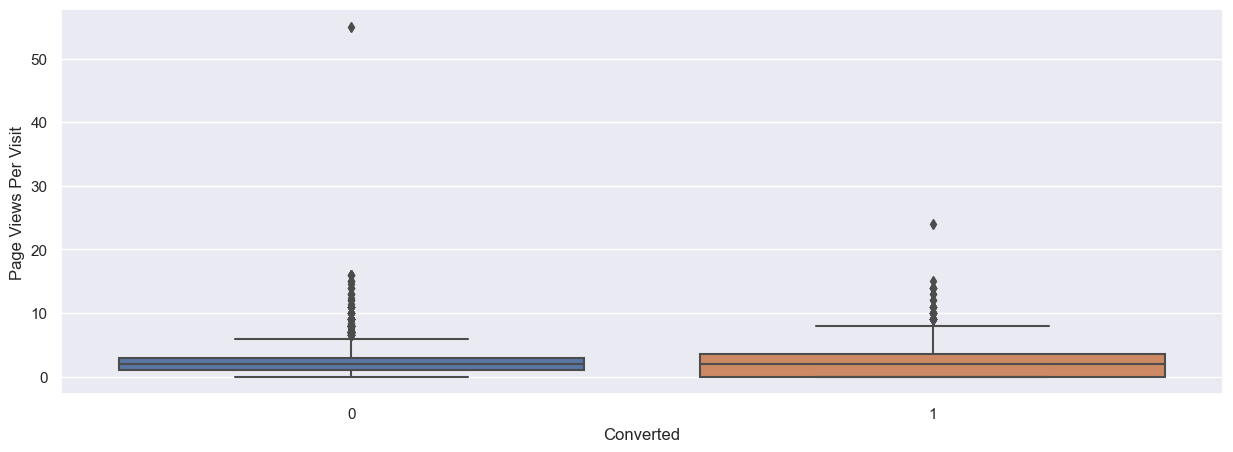

In [55]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

### Inferences

#### In the column for Page Views Per Visit, there are several outliers.The outliers will be capped at 95%.


In [56]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

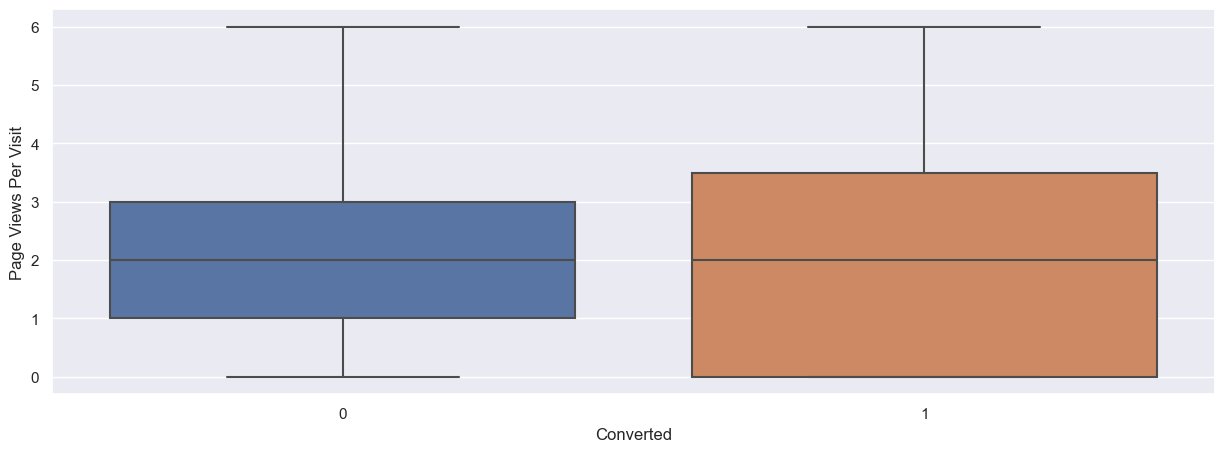

In [57]:
plt.figure(figsize=(15,5))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

### Inferences
#### From the boxplot shown above, it is clear that:

 - #### The median is the same for both converted and non-converted leads.
 
- #### People who browse an average of 1 to 3 pages on the website have a 50/50 probability of applying or not for the course.
    
- #### The likelihood of conversion is higher for those who never view any pages.  
  

 - ### <u> Last Activity

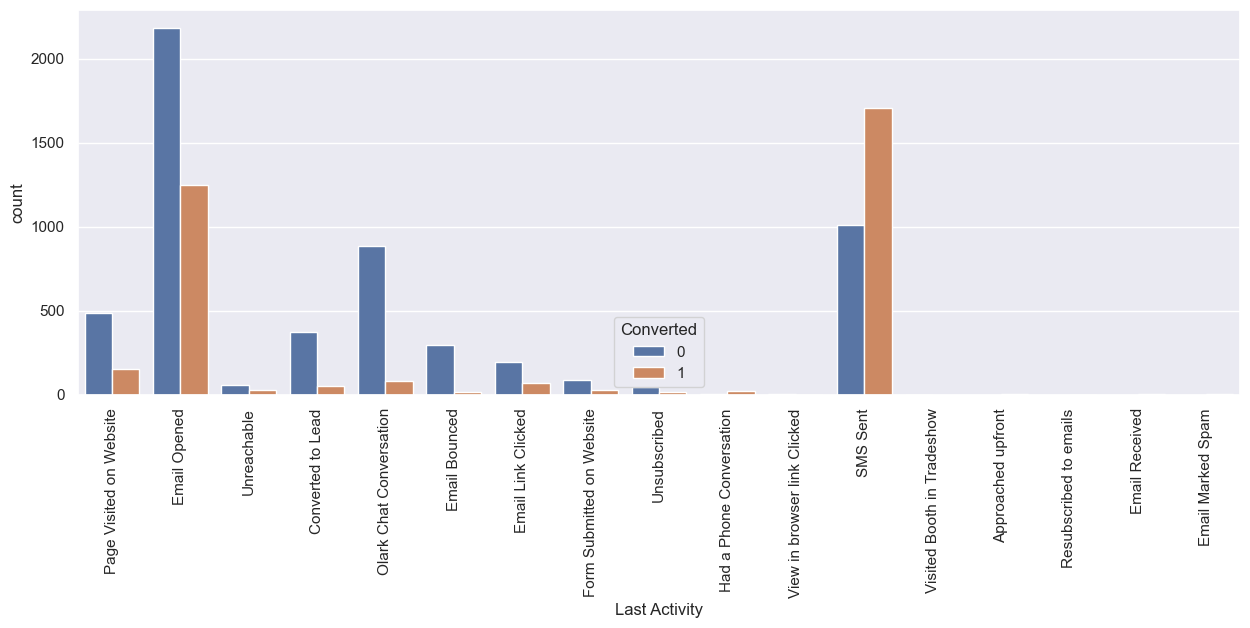

In [58]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [59]:
conversion_summary(leads_data,"Last Activity")

Converted                          0       1  Conversion(%)
Last Activity                                              
Approached upfront               0.0     5.0          100.0
Email Marked Spam                0.0     2.0          100.0
Resubscribed to emails           0.0     1.0          100.0
Email Received                   0.0     2.0          100.0
Had a Phone Conversation         5.0    20.0           80.0
SMS Sent                      1011.0  1705.0           63.0
Email Opened                  2182.0  1250.0           36.0
Unreachable                     61.0    29.0           32.0
Email Link Clicked             194.0    73.0           27.0
Form Submitted on Website       88.0    28.0           24.0
Page Visited on Website        489.0   151.0           24.0
Unsubscribed                    45.0    14.0           24.0
View in browser link Clicked     5.0     1.0           17.0
Converted to Lead              374.0    54.0           13.0
Olark Chat Conversation        888.0    

### Inferences
#### The boxplot shown above leads us to believe that:

 - #### The majority of leads come from those who have recently sent or read an email.

 - #### The conversion rate is between 36% and 63%.

 - #### The folks with the least recent activity are those who are approached directly, have emails marked as spam, and so on.renewed email subscriptions, emails receivedLink to see in browser clicked and visited the trade fair booth  
 
 - #### Significant numbers of leads are generated via olark chat conversations and website page visits, yet those lead conversion rates are just 9% and 24%, respectively.

 - #### Focus should be placed on increasing lead conversion for those who have recently engaged in an online chat, sent a text message, or visited a website page in order to increase total lead conversion rate.

 


 - ### <u> Specialization

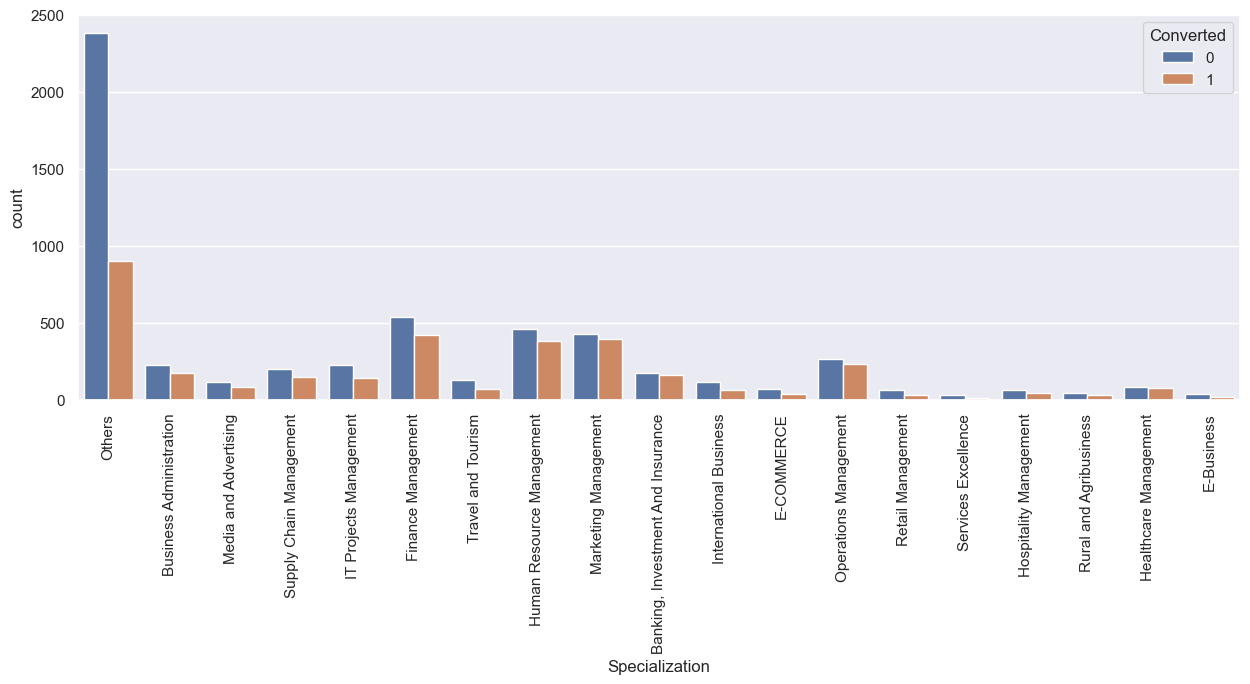

In [60]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Specialization", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [61]:
conversion_summary(leads_data,"Specialization")

Converted                             0    1  Conversion(%)
Specialization                                             
Banking, Investment And Insurance   171  164           49.0
Healthcare Management                80   76           49.0
Marketing Management                426  397           48.0
Operations Management               265  234           47.0
Human Resource Management           457  380           45.0
Finance Management                  537  422           44.0
Business Administration             224  175           44.0
Supply Chain Management             198  148           43.0
Rural and Agribusiness               42   31           42.0
Media and Advertising               118   84           42.0
Hospitality Management               66   45           41.0
IT Projects Management              226  140           38.0
E-Business                           36   21           37.0
International Business              114   62           35.0
E-COMMERCE                           72 

### Inferences

#### We may deduce the following from the plot and conversion description above:

 - #### Most specialisations have a conversion rate of between 40 and 50 percent.


 - ### <u> Occupation

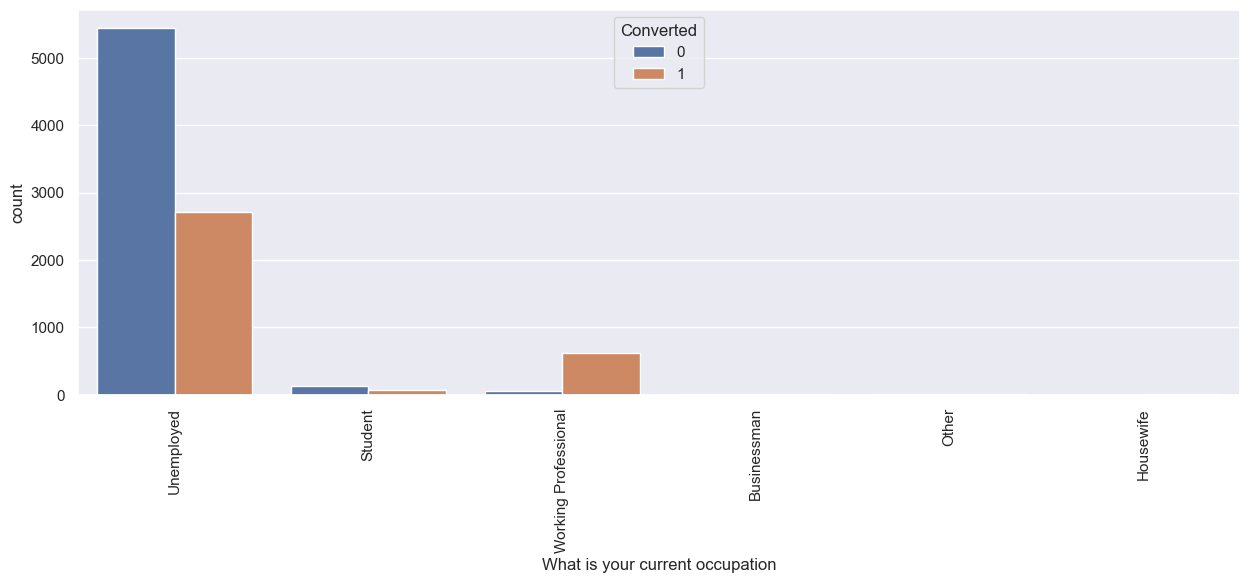

In [62]:
plt.figure(figsize=(15,5))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

In [63]:
conversion_summary(leads_data,"What is your current occupation")

Converted                             0       1  Conversion(%)
What is your current occupation                               
Housewife                           0.0     9.0          100.0
Working Professional               55.0   622.0           92.0
Businessman                         3.0     5.0           62.0
Other                               6.0     9.0           60.0
Student                           132.0    74.0           36.0
Unemployed                       5443.0  2716.0           33.0


### Inferences

#### We may deduce the following from the plot and conversion description above:

 - #### Maximum leads are generated by employed professionals and jobless individuals.
 
 - #### Professionals in the workforce convert at a high rate of over 92%, whereas unemployed people convert at a rate of about 33%.
 
 - #### The lead conversion rate of jobless people should be improved in order to increase total lead conversion rate.Increase the number of leads you get from working professionals.

 


 - ### <u> Search, Newspaper article , X Education Forums , Newspaper, Digital Advertisement ,Through Recommendations

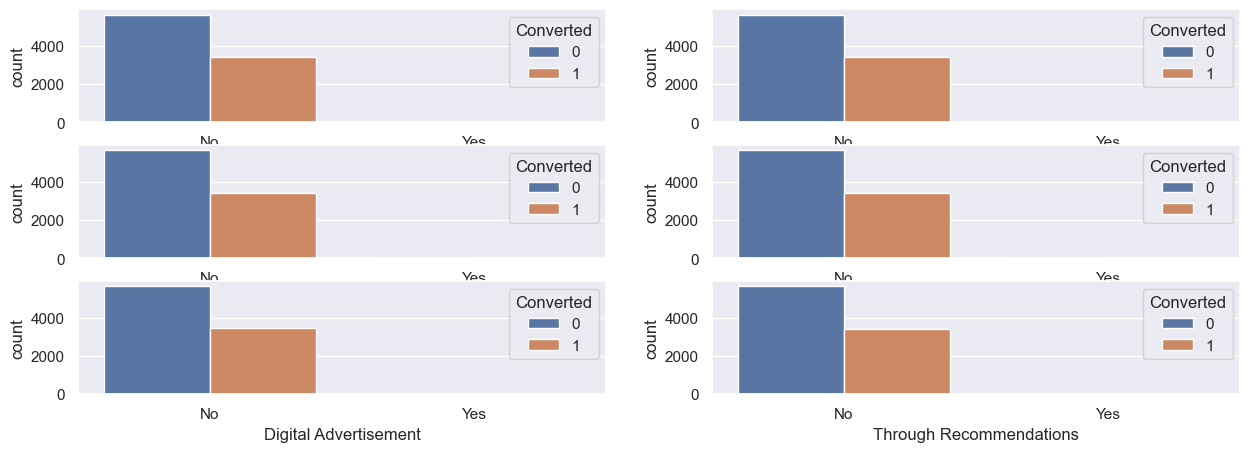

In [64]:
plt.figure(figsize=(15,5))

plt.subplot(3,2,1)
sns.countplot(x = "Search", hue = "Converted", data = leads_data)

plt.subplot(3,2,2)
sns.countplot(x = "Newspaper Article", hue = "Converted", data = leads_data)

plt.subplot(3,2,3)
sns.countplot(x = "X Education Forums", hue = "Converted", data = leads_data)

plt.subplot(3,2,4)
sns.countplot(x = "Newspaper", hue = "Converted", data = leads_data)

plt.subplot(3,2,5)
sns.countplot(x = "Digital Advertisement", hue = "Converted", data = leads_data)

plt.subplot(3,2,6)
sns.countplot(x = "Through Recommendations", hue = "Converted", data = leads_data)

plt.show()

### Inferences

#### Nearly 99% of buyers have not come across the X Education advertisement through search, newspaper articles, forums, newspapers, digital advertisements, or recommendations.

 - ### <u> City

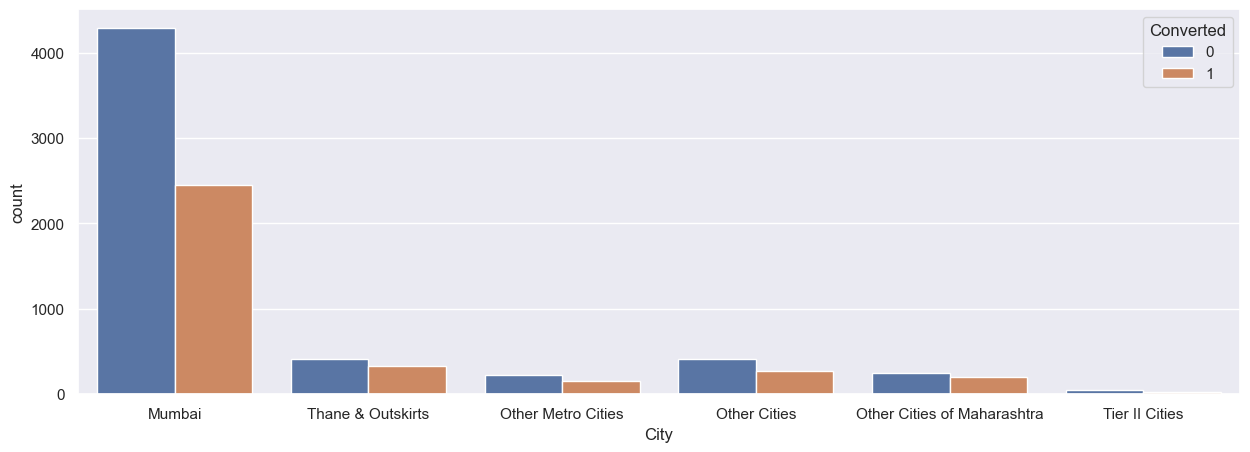

In [65]:
plt.figure(figsize=(15,5))
sns.countplot(x = "City", hue = "Converted", data = leads_data)

plt.show()

In [66]:
conversion_summary(leads_data,"City")

Converted                       0     1  Conversion(%)
City                                                  
Thane & Outskirts             413   332           45.0
Other Cities of Maharashtra   250   196           44.0
Other Metro Cities            223   154           41.0
Other Cities                  408   272           40.0
Mumbai                       4296  2456           36.0
Tier II Cities                 49    25           34.0


### Inferences

#### Mumbai generates the most leads, with a conversion rate of about 36%.Therefore, the focus should be on raising Mumbai's conversion rate.

 - ### <u> A free copy of Mastering The Interview

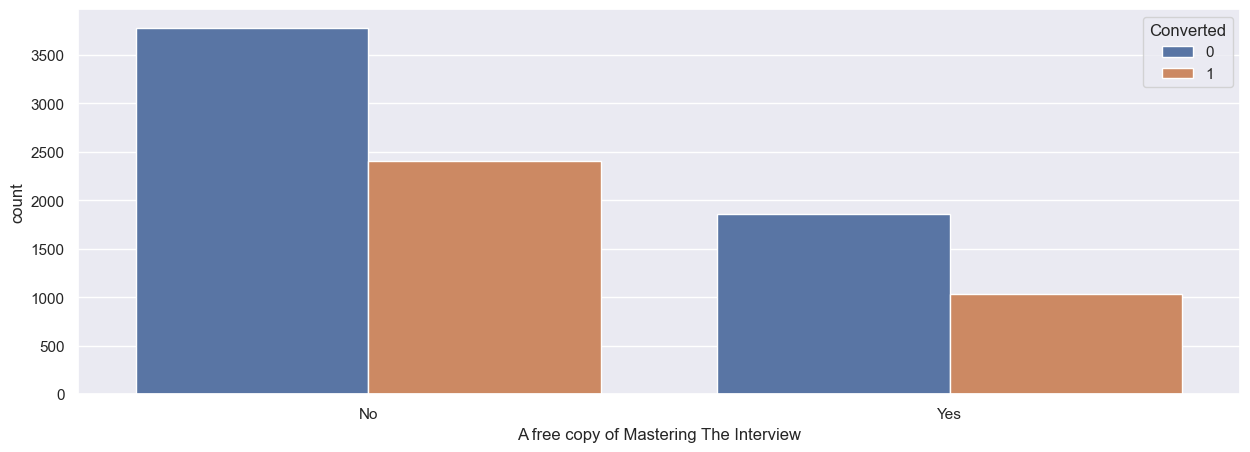

In [67]:
plt.figure(figsize=(15,5))
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = leads_data)

plt.show()

In [68]:
conversion_summary(leads_data,"A free copy of Mastering The Interview")

Converted                                  0     1  Conversion(%)
A free copy of Mastering The Interview                           
No                                      3781  2405           39.0
Yes                                     1858  1030           36.0


### Inferences

 - #### Most buyers weren't interested in the complimentary copy of Mastering The Interview.
    
 - #### Customers who chose the free copy had a 36% conversion rate, while those who did not choose had a 39% conversion rate.

    
   

 - ### <u> Last Notable Activity

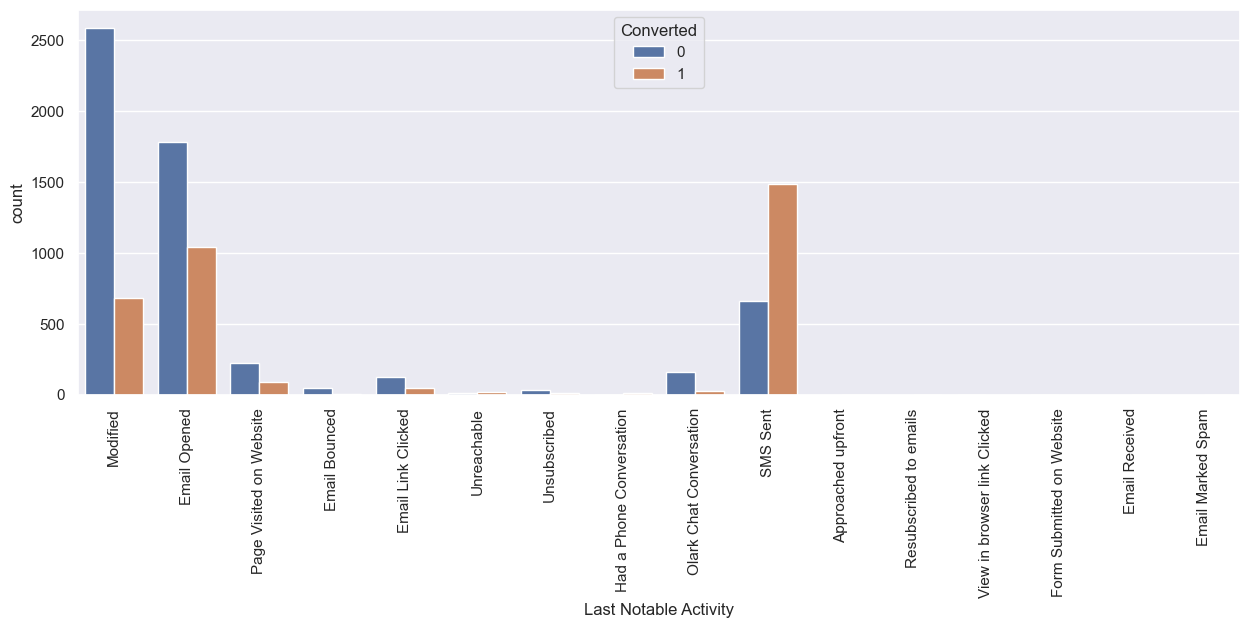

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = leads_data)
plt.xticks(rotation = 90)
plt.show()

### Inferences 

#### This column and the Last Activity column are extremely similar.

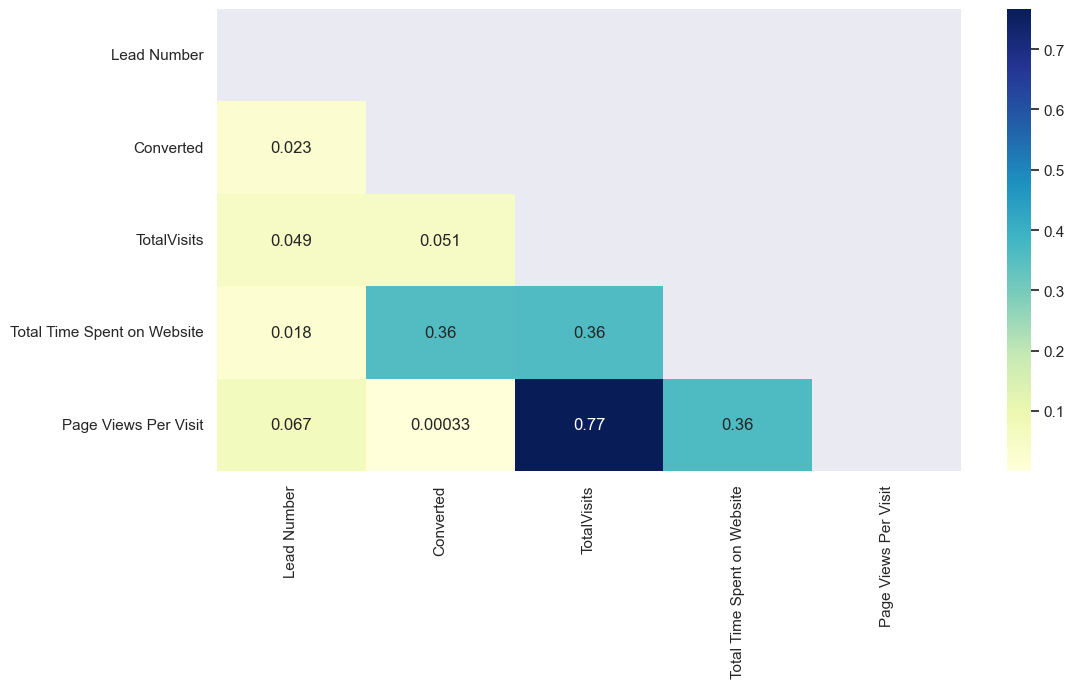

In [70]:
#check correlation among variables
plt.figure(figsize = (12,6))
mask = np.zeros_like(leads_data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(leads_data.corr(), mask=mask,annot = True, cmap="YlGnBu")
plt.show()

### Inferences

 - #### The columns for overall visits and page views per visit are connected. 

 - #### Thus, to prevent multi-collinearity, we should include any of these columns in our model.


### We draw the conclusion that numerous variables are not important to the model based on our data analysis.So, we may disregard them for further investigation.

In [71]:
leads_data = leads_data.drop(['Lead Number','Search','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations'],1)

In [72]:
leads_data.shape

(9074, 14)

## Step 4 - Data Preparation

### Converting binary variables (Yes/No) to 1/0

In [73]:
# List of binary variables
binary_var_list =  ['A free copy of Mastering The Interview','Do Not Email','Do Not Call']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the map function to the binary variables list
leads_data[binary_var_list] = leads_data[binary_var_list].apply(binary_map)

### Create a dummy variable for the categorical variables

In [74]:
dummy = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity']
dummy_data = pd.get_dummies(leads_data[dummy],drop_first=True)
dummy_data.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
# Combining dummy data with the original dataset

leads_data = pd.concat([leads_data, dummy_data], axis=1)
leads_data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,Mumbai,0,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Others,Unemployed,Mumbai,0,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Mumbai,1,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Mumbai,0,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed,Mumbai,0,Modified,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [76]:
# Drop the original columns 
drop_cols = ['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','City','Last Notable Activity','Lead Source_Others','Specialization_Others']
leads_data = leads_data.drop(drop_cols, axis=1)
leads_data.head()



,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,2.0,1428,1.0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [77]:
#check the shape of dataframe
leads_data.shape

(9074, 75)

## Step 5 - Train-Test Split

In [78]:
# Putting feature variable to X
X = leads_data.drop(['Converted'], axis=1)


# Putting response variable to y
y = leads_data['Converted']

In [79]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 6 - Feature Scaling

In [80]:
#create object of StandardScaler
scaler = StandardScaler()

#Apply scaler() to numerical columns
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.432779,-0.160255,-0.155018,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.432779,-0.540048,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.150329,-0.888650,-1.265540,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.432779,1.643304,-0.155018,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.643547,2.017593,0.122613,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Step 7 - Feature Selection Using RFE

In [81]:
logreg = LogisticRegression()

# running RFE with 20 variables as output
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [82]:
rfe.support_

array([ True, False, False,  True, False, False, False,  True,  True,
       False, False,  True, False,  True, False,  True,  True,  True,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False,  True,  True,  True, False, False, False,
       False, False])

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 2),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 45),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Facebook', False, 37),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 39),
 ('Last Activity_Email Marked Spam', False, 9),
 ('Last Activity_Email Opened', False, 51),
 ('Last Activity_Email Received', False, 50),
 ('Last Activity_Form Submitted on Website', False, 29),
 ('Last Activity_Had a Phone 

In [84]:
col1 = X_train.columns[rfe.support_]
col1

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [85]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Organic Search',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Opened',
       'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Man

## Step 9 - Model Building

In [86]:
#BUILDING MODEL #1
X_train_sm = sm.add_constant(X_train[col1])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2623.1
Date:                Tue, 23 May 2023   Deviance:                       5246.2
Time:                        01:34:47   Pearson chi2:                 6.40e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3977
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.3765      0.603      2.282      0.022       0.194       2.559
Do Not Email                                            -1.6059      0.200     -8.040      0.000      -1.997      -1.214
Total Time Spent on Website                              1.1340      0.041     27.904      0.000       1.054       1.214
Lead Origin_Lead Add Form                                2.1380      0.927      2.308      0.021       0.322       3.954
Lead Origin_Lead Import                                  1.5445      0.457      3.378      0.001       0.648       2.441
Lead Source_Olark Chat                                   1.2434      0.104     11.904      0.000       1.039       1.448
Lead Source_Reference                                    1.8217      0.951      1.915      0.056      -0.043       3.686
Lead Source_Welingak Website                             3.8664      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1086      0.228     -4.857      0.000      -1.556      -0.661
Last Activity_Email Bounced                             -1.2769      0.425     -3.002      0.003      -2.111      -0.443
Last Activity_Had a Phone Conversation                   1.9240      0.783      2.458      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3307      0.191     -6.983      0.000      -1.704      -0.957
What is your current occupation_Housewife               21.6424   1.57e+04      0.001      0.999   -3.08e+04    3.08e+04
What is your current occupation_Student                 -0.7930      0.638     -1.242      0.214      -2.044       0.458
What is your current occupation_Unemployed              -1.1988      0.599     -2.001      0.045      -2.373      -0.024
What is your current occupation_Working Professional     1.5641      0.626      2.498      0.012       0.337       2.791
Last Notable Activity_Email Link Clicked                -1.8842      0.255     -7.377      0.000      -2.385      -1.384
Last Notable Activity_Email Opened                      -1.4250      0.088    -16.122      0.000      -1.598      -1.252
Last Notable Activity_Modified                          -1.7447      0.100    -17.394      0.000      -1.941      -1.548
Last Notable Activity_Olark Chat Conversation           -1.5331      0.369     -4.152      0.000      -2.257      -0.809
Last Notable Activity_Page Visited on Website           -1.6991      0.202     -8.399      0.000      -2.096      -1.303
========================================================================================================================
"""

In [87]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col1].columns
vif['VIF'] = [variance_inflation_factor(X_train[col1].values, i) for i in range(X_train[col1].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.09
6,Lead Source_Welingak Website,15.47
13,What is your current occupation_Unemployed,4.40
17,Last Notable Activity_Modified,3.09
16,Last Notable Activity_Email Opened,2.27
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


### Inferences
 - #### For the column "What is your current occupation_Housewife" the p value is extremely high and over the cutoff. We will thus remove this column from our model.


In [88]:
col2 = col1.drop('What is your current occupation_Housewife',1)
col2

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Converted to Lead',
       'Last Activity_Email Bounced', 'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [89]:
#BUILDING MODEL #2
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6331
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2625.0
Date:                Tue, 23 May 2023   Deviance:                       5249.9
Time:                        01:34:47   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3973
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8072      0.557      3.245      0.001       0.716       2.899
Do Not Email                                            -1.6087      0.200     -8.045      0.000      -2.001      -1.217
Total Time Spent on Website                              1.1329      0.041     27.899      0.000       1.053       1.213
Lead Origin_Lead Add Form                                2.1374      0.926      2.307      0.021       0.322       3.953
Lead Origin_Lead Import                                  1.5422      0.457      3.373      0.001       0.646       2.438
Lead Source_Olark Chat                                   1.2414      0.104     11.887      0.000       1.037       1.446
Lead Source_Reference                                    1.8263      0.951      1.920      0.055      -0.038       3.691
Lead Source_Welingak Website                             3.8666      1.176      3.288      0.001       1.562       6.171
Last Activity_Converted to Lead                         -1.1055      0.228     -4.844      0.000      -1.553      -0.658
Last Activity_Email Bounced                             -1.2726      0.426     -2.991      0.003      -2.107      -0.439
Last Activity_Had a Phone Conversation                   1.9249      0.783      2.459      0.014       0.391       3.459
Last Activity_Olark Chat Conversation                   -1.3304      0.191     -6.976      0.000      -1.704      -0.957
What is your current occupation_Student                 -1.2238      0.595     -2.057      0.040      -2.390      -0.058
What is your current occupation_Unemployed              -1.6290      0.553     -2.946      0.003      -2.713      -0.545
What is your current occupation_Working Professional     1.1336      0.582      1.948      0.051      -0.007       2.274
Last Notable Activity_Email Link Clicked                -1.8809      0.255     -7.378      0.000      -2.381      -1.381
Last Notable Activity_Email Opened                      -1.4229      0.088    -16.103      0.000      -1.596      -1.250
Last Notable Activity_Modified                          -1.7475      0.100    -17.419      0.000      -1.944      -1.551
Last Notable Activity_Olark Chat Conversation           -1.5323      0.369     -4.150      0.000      -2.256      -0.809
Last Notable Activity_Page Visited on Website           -1.7018      0.202     -8.416      0.000      -2.098      -1.305
========================================================================================================================
"""

In [90]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col2].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,62.43
5,Lead Source_Reference,48.08
6,Lead Source_Welingak Website,15.47
12,What is your current occupation_Unemployed,4.37
16,Last Notable Activity_Modified,3.08
15,Last Notable Activity_Email Opened,2.25
10,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
8,Last Activity_Email Bounced,1.76


### Inferences
 - #### The 'Lead Source_Reference' column's p value and VIF value are high and over the cutoff.We shall thus remove this column.
    

In [91]:
col3 = col2.drop('Lead Source_Reference',1)
col3

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [92]:
#BUILDING MODEL #3
X_train_sm = sm.add_constant(X_train[col3])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.5
Date:                Tue, 23 May 2023   Deviance:                       5252.9
Time:                        01:34:47   Pearson chi2:                 6.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3971
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.8104      0.556      3.254      0.001       0.720       2.901
Do Not Email                                            -1.6042      0.200     -8.036      0.000      -1.995      -1.213
Total Time Spent on Website                              1.1321      0.041     27.879      0.000       1.053       1.212
Lead Origin_Lead Add Form                                3.8941      0.222     17.525      0.000       3.459       4.330
Lead Origin_Lead Import                                  1.5407      0.457      3.370      0.001       0.645       2.437
Lead Source_Olark Chat                                   1.2385      0.104     11.854      0.000       1.034       1.443
Lead Source_Welingak Website                             2.1077      0.755      2.792      0.005       0.628       3.587
Last Activity_Converted to Lead                         -1.1061      0.228     -4.848      0.000      -1.553      -0.659
Last Activity_Email Bounced                             -1.2767      0.425     -3.001      0.003      -2.110      -0.443
Last Activity_Had a Phone Conversation                   1.9242      0.783      2.459      0.014       0.390       3.458
Last Activity_Olark Chat Conversation                   -1.3294      0.191     -6.972      0.000      -1.703      -0.956
What is your current occupation_Student                 -1.2245      0.594     -2.060      0.039      -2.389      -0.060
What is your current occupation_Unemployed              -1.6322      0.552     -2.956      0.003      -2.715      -0.550
What is your current occupation_Working Professional     1.1322      0.581      1.948      0.051      -0.007       2.271
Last Notable Activity_Email Link Clicked                -1.8768      0.255     -7.372      0.000      -2.376      -1.378
Last Notable Activity_Email Opened                      -1.4222      0.088    -16.099      0.000      -1.595      -1.249
Last Notable Activity_Modified                          -1.7466      0.100    -17.418      0.000      -1.943      -1.550
Last Notable Activity_Olark Chat Conversation           -1.5312      0.369     -4.148      0.000      -2.255      -0.808
Last Notable Activity_Page Visited on Website           -1.7066      0.203     -8.422      0.000      -2.104      -1.309
========================================================================================================================
"""

In [93]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col3].columns
vif['VIF'] = [variance_inflation_factor(X_train[col3].values, i) for i in range(X_train[col3].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,4.37
15,Last Notable Activity_Modified,3.08
14,Last Notable Activity_Email Opened,2.25
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.86
4,Lead Source_Olark Chat,1.78
7,Last Activity_Email Bounced,1.76
2,Lead Origin_Lead Add Form,1.61
16,Last Notable Activity_Olark Chat Conversation,1.38
5,Lead Source_Welingak Website,1.33


### Inferences
 - #### The P value for column 'What is your current occupation_Working Professional' is high and above the threshold.Hence we will drop it

In [94]:
col4 = col3.drop('What is your current occupation_Working Professional',1)
col4

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [95]:
#BUILDING MODEL #4
X_train_sm = sm.add_constant(X_train[col4])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2628.2
Date:                Tue, 23 May 2023   Deviance:                       5256.4
Time:                        01:34:47   Pearson chi2:                 6.37e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3967
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                             2.8485      0.186     15.322      0.000       2.484       3.213
Do Not Email                                     -1.6057      0.200     -8.035      0.000      -1.997      -1.214
Total Time Spent on Website                       1.1315      0.041     27.869      0.000       1.052       1.211
Lead Origin_Lead Add Form                         3.8935      0.222     17.523      0.000       3.458       4.329
Lead Origin_Lead Import                           1.5452      0.456      3.386      0.001       0.651       2.440
Lead Source_Olark Chat                            1.2393      0.104     11.864      0.000       1.035       1.444
Lead Source_Welingak Website                      2.1082      0.755      2.792      0.005       0.628       3.588
Last Activity_Converted to Lead                  -1.0930      0.227     -4.807      0.000      -1.539      -0.647
Last Activity_Email Bounced                      -1.2666      0.425     -2.982      0.003      -2.099      -0.434
Last Activity_Had a Phone Conversation            1.9244      0.783      2.459      0.014       0.390       3.459
Last Activity_Olark Chat Conversation            -1.3309      0.191     -6.970      0.000      -1.705      -0.957
What is your current occupation_Student          -2.2601      0.283     -7.986      0.000      -2.815      -1.705
What is your current occupation_Unemployed       -2.6681      0.178    -14.972      0.000      -3.017      -2.319
Last Notable Activity_Email Link Clicked         -1.8769      0.254     -7.379      0.000      -2.375      -1.378
Last Notable Activity_Email Opened               -1.4251      0.088    -16.146      0.000      -1.598      -1.252
Last Notable Activity_Modified                   -1.7513      0.100    -17.472      0.000      -1.948      -1.555
Last Notable Activity_Olark Chat Conversation    -1.5314      0.369     -4.150      0.000      -2.255      -0.808
Last Notable Activity_Page Visited on Website    -1.7132      0.202     -8.462      0.000      -2.110      -1.316
=================================================================================================================
"""

In [96]:
#check variance inflation factor
vif = pd.DataFrame()
vif['Features'] = X_train[col4].columns
vif['VIF'] = [variance_inflation_factor(X_train[col4].values, i) for i in range(X_train[col4].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,3.84
14,Last Notable Activity_Modified,2.88
13,Last Notable Activity_Email Opened,2.03
9,Last Activity_Olark Chat Conversation,1.99
0,Do Not Email,1.85
7,Last Activity_Email Bounced,1.76
4,Lead Source_Olark Chat,1.74
2,Lead Origin_Lead Add Form,1.42
15,Last Notable Activity_Olark Chat Conversation,1.37
5,Lead Source_Welingak Website,1.31


### Inferences

 - #### All of the variables' VIF values are below the threshold value of 5.

 - #### All variables' p values fall below the 0.05 cutoff.

 - #### As a result, we will choose Model 3 as our final model for additional investigation.


In [97]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.193723
1012    0.346426
9226    0.208003
4750    0.884912
7987    0.670832
1281    0.771662
2880    0.096055
4971    0.911700
7536    0.864838
1248    0.629796
dtype: float64

In [98]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]


array([0.19372317, 0.34642596, 0.20800297, 0.88491216, 0.67083171,
       0.77166191, 0.09605542, 0.91170047, 0.86483817, 0.62979608])

### Creating a dataframe with the actual 'Converted' flag and the predicted 'Lead_Score_Prob' probabilities

In [99]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Lead_Score_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Lead_Score_Prob,Prospect ID
0,0,0.193723,3009
1,0,0.346426,1012
2,0,0.208003,9226
3,1,0.884912,4750
4,1,0.670832,7987


In [100]:
#Creating new column 'Predicted' with value 1 if Lead_Score_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted
0,0,0.193723,3009,0
1,0,0.346426,1012,0
2,0,0.208003,9226,0
3,1,0.884912,4750,1
4,1,0.670832,7987,1


## Step 10 - Model Evaluation

In [101]:
# Confusion matrix 
confusion = confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3455  450]
 [ 726 1720]]


In [102]:
# check the overall accuracy.
print(accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.814832309872461


In [103]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Let us calculate sensitivity 
round((TP / float(TP+FN)),2)

0.7

In [105]:
# Let us calculate specificity
round((TN / float(TN+FP)),2)

0.88

In [106]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.11523687580025609


In [107]:
# positive predictive value 
print (TP / float(TP+FP))

0.7926267281105991


In [108]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8263573307821095


## Step 11 - Plotting the ROC Curve


 - #### Any rise in sensitivity will be followed by a fall in specificity, as seen by the ROC curve.

 - #### The accuracy of the test increases with the distance the curve follows the left-hand boundary and subsequently the top border of the ROC space.

 - #### The test is less accurate the closer the curve gets to the ROC space's 45-degree diagonal.


In [109]:
def plot_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [110]:
fpr, tpr, thresholds = roc_curve( y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob, drop_intermediate = False )

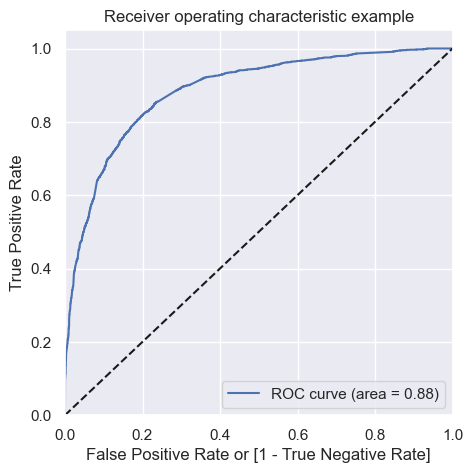

In [111]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Lead_Score_Prob)

#### The ideal value for the ROC Curve is close to 1. A result of 0.88 is returned, which denotes a strong prediction model.

## Step 12 - Finding Optimal Cutoff Point

#### We had previously selected an arbitrary cut-off value of 0.5. We must choose the ideal cut-off value.

#### The cutoff probability that provides balanced sensitivity and specificity is the ideal cutoff probability.

In [112]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.193723,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.346426,1012,0,1,1,1,1,0,0,0,0,0,0
2,0,0.208003,9226,0,1,1,1,0,0,0,0,0,0,0
3,1,0.884912,4750,1,1,1,1,1,1,1,1,1,1,0
4,1,0.670832,7987,1,1,1,1,1,1,1,1,0,0,0


In [113]:
cutoff_data = pd.DataFrame( columns = ['Probability','Accuracy','Sensitivity','Specificty'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_data.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_data)

     Probability  Accuracy  Sensitivity  Specificty
0.0          0.0  0.385136     1.000000    0.000000
0.1          0.1  0.597386     0.969338    0.364405
0.2          0.2  0.749961     0.918643    0.644302
0.3          0.3  0.799244     0.843827    0.771319
0.4          0.4  0.813888     0.771464    0.840461
0.5          0.5  0.814832     0.703189    0.884763
0.6          0.6  0.809951     0.640229    0.916261
0.7          0.7  0.780822     0.513083    0.948528
0.8          0.8  0.758621     0.420687    0.970294
0.9          0.9  0.713588     0.274734    0.988476


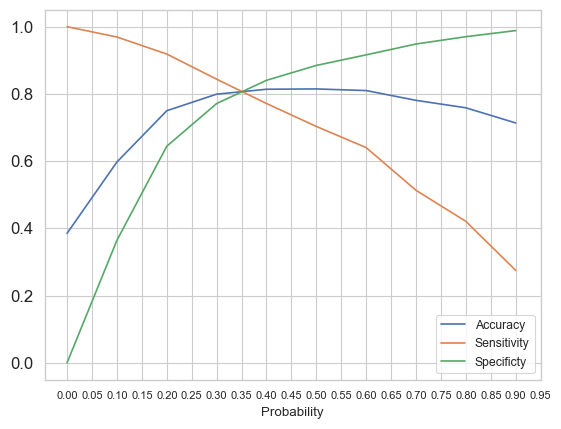

In [114]:
# Let's plot accuracy sensitivity and specificity for various probabilities.

sns.set_style('whitegrid')
sns.set_context('paper')

cutoff_data.plot.line(x='Probability', y=['Accuracy','Sensitivity','Specificty'])
plt.xticks(np.arange(0,1,step=.05), size=8)
plt.yticks(size=12)
plt.show()

### Inferences

#### The ideal cutoff is at 0.35, as seen by the graph above. At this moment, accuracy, sensitivity, and specificity are all equally balanced.


In [115]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.193723,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.346426,1012,0,1,1,1,1,0,0,0,0,0,0,0
2,0,0.208003,9226,0,1,1,1,0,0,0,0,0,0,0,0
3,1,0.884912,4750,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.670832,7987,1,1,1,1,1,1,1,1,0,0,0,1


In [116]:
#Assigning lead score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Lead_Score_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Lead_Score_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.193723,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.346426,1012,0,1,1,1,1,0,0,0,0,0,0,0,35
2,0,0.208003,9226,0,1,1,1,0,0,0,0,0,0,0,0,21
3,1,0.884912,4750,1,1,1,1,1,1,1,1,1,1,0,1,88
4,1,0.670832,7987,1,1,1,1,1,1,1,1,0,0,0,1,67


In [117]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8083766336010078

In [118]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3152,  753],
       [ 464, 1982]])

In [119]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [120]:
# Let's check the sensitivity 
TP / float(TP+FN)

0.8103025347506132

In [121]:
# Let us calculate specificity
TN / float(TN+FP)

0.8071702944942382

In [122]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.19282970550576184


In [123]:
# positive predictive value 
print (TP / float(TP+FP))

0.7246800731261426


In [124]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8716814159292036


### Inferences

#### The different performance criteria Accuracy, Sensitivity, and Specificity are all 80 - 81% when we choose the ideal cutoff = 0.35.


## Step 13 - Metrics - Precision and Recall

#### Precision and recall, which indicate the score for result relevancy and the number of actually relevant results returned, are two crucial factors that need to be checked in order to improve model stability and predictability.


In [125]:
#Calculating Precision
precision =round(TP/float(TP+FP),2)
precision

0.72

In [126]:
#Calculating Recall
recall = round(TP/float(TP+FN),2)
recall

0.81

In [127]:
#Calculating precision using precision_score function from sklearn
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7246800731261426

In [128]:
#Calculating recall using recall_score function from sklearn
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8103025347506132

### Inferences

 - #### The recall % is very important for our company purpose since we don't want to miss any hot leads who are ready to convert.
 - #### Thus, recall of 81% indicates a good model.


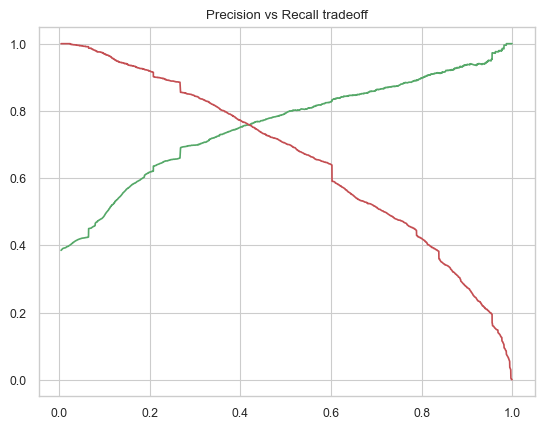

In [129]:
#Let us generate the Precision vs Recall tradeoff curve 
p ,r, thresholds=precision_recall_curve(y_train_pred_final.Converted,y_train_pred_final['Lead_Score_Prob'])
plt.title('Precision vs Recall tradeoff')
# Plotting precision
plt.plot(thresholds, p[:-1], "g-") 
# Plotting Recall
plt.plot(thresholds, r[:-1], "r-")   
plt.show()


#### Precision and recall are traded off, as can be seen from the image above. Precision and recall have an inverse relationship, so if one improves, the other will actually decline. 


## Step 14 - Making predictions on the test set

In [130]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [131]:
X_test = X_test[col4]

X_test.shape

(2723, 17)

In [132]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3271,0,-0.600595,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
1490,0,1.887326,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7936,0,-0.752879,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
4216,0,-0.888650,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3830,0,-0.587751,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [133]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [134]:
#making predictions on test set
y_test_pred = res.predict(X_test_sm)

In [135]:
y_test_pred[:10]

3271    0.127391
1490    0.972316
7936    0.109435
4216    0.848794
3830    0.129015
1800    0.640074
6507    0.364193
4821    0.302725
4223    0.955575
4714    0.208003
dtype: float64

In [136]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.127391
1490,0.972316
7936,0.109435
4216,0.848794
3830,0.129015


In [137]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [138]:
# Putting prospect ID to index
y_test_df['Prospect ID'] = y_test_df.index

In [139]:
# Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [140]:
# Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [141]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.127391
1,1,1490,0.972316
2,0,7936,0.109435
3,1,4216,0.848794
4,0,3830,0.129015


In [142]:
# Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Lead_Score_Prob'})

In [143]:
# Rearranging the columns

y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Lead_Score_Prob'], axis=1)

In [144]:
# Adding Lead_Score column

y_pred_final['Lead_Score'] = round((y_pred_final['Lead_Score_Prob'] * 100),0)

y_pred_final['Lead_Score'] = y_pred_final['Lead_Score'].astype(int)

In [145]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score
0,3271,0,0.127391,13
1,1490,1,0.972316,97
2,7936,0,0.109435,11
3,4216,1,0.848794,85
4,3830,0,0.129015,13


In [146]:
y_pred_final['final_Predicted'] = y_pred_final.Lead_Score_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [147]:
y_pred_final.head()

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted
0,3271,0,0.127391,13,0
1,1490,1,0.972316,97,1
2,7936,0,0.109435,11,0
3,4216,1,0.848794,85,1
4,3830,0,0.129015,13,0


In [148]:
#classifying leads based on Lead score
y_pred_final['Lead_Type'] = y_pred_final.Lead_Score.map(lambda x: 'Hot Lead' if x >35 else 'Cold Lead')
y_pred_final.sort_values(by='Lead_Score', ascending = False)

,Prospect ID,Converted,Lead_Score_Prob,Lead_Score,final_Predicted,Lead_Type
280,5797,1,0.996785,100,1,Hot Lead
23,5822,1,0.996785,100,1,Hot Lead
679,2680,1,0.996785,100,1,Hot Lead
2310,3723,1,0.996785,100,1,Hot Lead
2270,8505,1,0.995574,100,1,Hot Lead
...,...,...,...,...,...,...
716,6934,0,0.004428,0,0,Cold Lead
1552,626,0,0.004446,0,0,Cold Lead
1911,6669,0,0.004502,0,0,Cold Lead
895,6527,0,0.004437,0,0,Cold Lead


In [149]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.803892765332354

In [150]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1400,  334],
       [ 200,  789]])

In [151]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [152]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7977755308392316

In [153]:
# Let us calculate specificity
TN / float(TN+FP)

0.8073817762399077

In [154]:
precision_score(y_pred_final.Converted , y_pred_final.final_Predicted)

0.7025823686553874

In [155]:
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.7977755308392316

### Final Observation:
#### Lets compare the  Model Performance parameters oobtained for Train & Test data:

 - #### Train Data: 
#### Accuracy : 80.83%
#### Sensitivity : 81.03%
#### Specificity : 80.71%
#### Precision : 72.46%
#### Recall : 81.03%



 - #### Test Data: 
#### Accuracy : 80.38%
#### Sensitivity : 79.77%
#### Specificity : 80.73%
#### Precision : 70.25%
#### Recall : 79.77%



### Inferences 


 - #### On performance measures comparing train and test data, we found a 1% difference.This suggests that our final model is working well and did not overfit the training set.

 - #### High specificity will guarantee that leads who are on the cusp of being converted or not are not picked, whilst high sensitivity will ensure that practically all leads who are likely to convert are accurately predicted.

 - #### In accordance with the needs of the company, we may raise or lower the probability threshold value, which will in turn affect the model's sensitivity and specificity.


### Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [156]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                    -1.61
Total Time Spent on Website                      1.13
Lead Origin_Lead Add Form                        3.89
Lead Origin_Lead Import                          1.55
Lead Source_Olark Chat                           1.24
Lead Source_Welingak Website                     2.11
Last Activity_Converted to Lead                 -1.09
Last Activity_Email Bounced                     -1.27
Last Activity_Had a Phone Conversation           1.92
Last Activity_Olark Chat Conversation           -1.33
What is your current occupation_Student         -2.26
What is your current occupation_Unemployed      -2.67
Last Notable Activity_Email Link Clicked        -1.88
Last Notable Activity_Email Opened              -1.43
Last Notable Activity_Modified                  -1.75
Last Notable Activity_Olark Chat Conversation   -1.53
Last Notable Activity_Page Visited on Website   -1.71
dtype: float64

In [157]:
#Getting a relative coeffient value for all the features wrt the feature with the highest coefficient


feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                    -41.24
Total Time Spent on Website                      29.06
Lead Origin_Lead Add Form                       100.00
Lead Origin_Lead Import                          39.69
Lead Source_Olark Chat                           31.83
Lead Source_Welingak Website                     54.15
Last Activity_Converted to Lead                 -28.07
Last Activity_Email Bounced                     -32.53
Last Activity_Had a Phone Conversation           49.43
Last Activity_Olark Chat Conversation           -34.18
What is your current occupation_Student         -58.05
What is your current occupation_Unemployed      -68.53
Last Notable Activity_Email Link Clicked        -48.21
Last Notable Activity_Email Opened              -36.60
Last Notable Activity_Modified                  -44.98
Last Notable Activity_Olark Chat Conversation   -39.33
Last Notable Activity_Page Visited on Website   -44.00
dtype: float64

In [158]:
##Sorting the feature variables based on their relative coefficient values

sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                     11
Total Time Spent on Website                      10
Lead Origin_Lead Add Form                        12
Lead Origin_Lead Import                          14
Lead Source_Olark Chat                           16
Lead Source_Welingak Website                      0
Last Activity_Converted to Lead                  15
Last Activity_Email Bounced                      13
Last Activity_Had a Phone Conversation            9
Last Activity_Olark Chat Conversation             7
What is your current occupation_Student           6
What is your current occupation_Unemployed        1
Last Notable Activity_Email Link Clicked          4
Last Notable Activity_Email Opened                3
Last Notable Activity_Modified                    8
Last Notable Activity_Olark Chat Conversation     5
Last Notable Activity_Page Visited on Website     2
dtype: int64

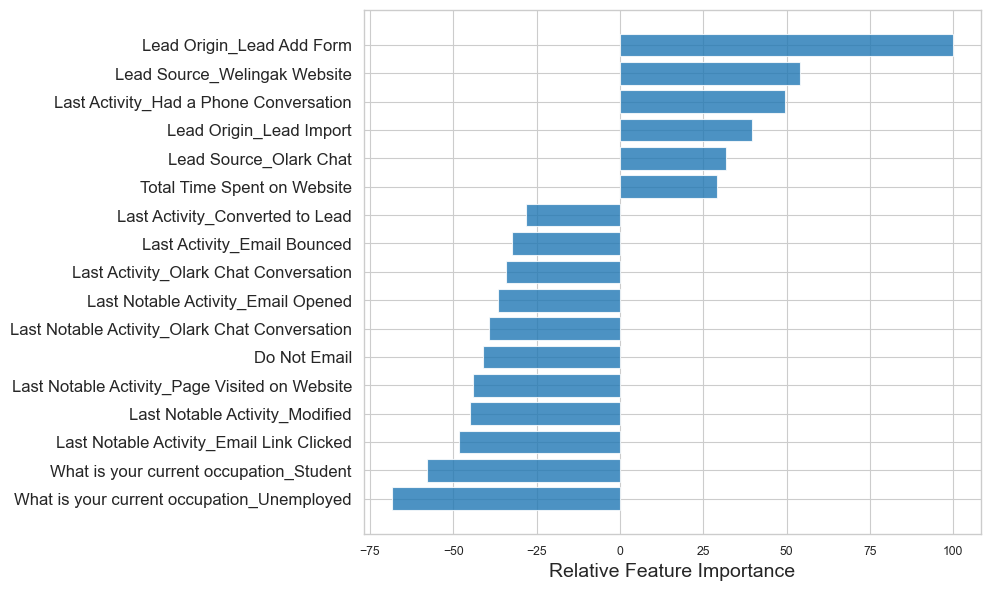

In [159]:
##Plot showing the feature variables based on their relative coefficient values

pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:blue',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col4].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Final Model Reporting & Equation-

#### log odds is given by: log(P/1-P) = c + B1X1 +B2X2 + B3X3 + .... + BnXn
    

#### log odds = 2.84 +(-1.60 * Do Not Email) + (1.13 * Total Time Spent on Website) + (3.89 * Lead Origin_Lead Add Form) + (1.54 * Lead Origin_Lead Import) + (1.23 * Lead Source_Olark Chat) + (2.10 * Lead Source_Welingak website) + (-1.09 * Last Activity_Converted to Lead) + (-1.26 * Last Activity_Email Bounced) + (1.92 * Last Activity_Had a Phone Conversation) + (-1.33 * Last Activity_Olark Chat Conversation) + (-2.66 * What is your current occupation_Unemployed) +  (-2.26 * What is your current occupation_Student) + (-1.87 * Last Notable Activity_Email Link Clicked) + (-1.42 * Last Notable Activity_Email Opened) + (-1.75 * Last Notable Activity_Modified) + (-1.53 * Last Notable Activity_Olark Chat Conversation) + (-1.71 * Last Notable Activity_Page Visited on Website ) 

### <u> Recommendations -

 - #### The sales staff at X-Education should concentrate on leads whose lead source is the Wellingak website, whose occupation is "Unemployed & Student," and whose lead origin is a lead add form.
 - #### Customers with a lead score of greater than 35 are classified as hot leads. The company's sales team should concentrate first on the "Hot Leads."
 - #### After the sales team has finished with the "Hot Leads," attention should turn to the "Cold Leads" (Customers with a lead score below 35).
 - #### Numerous significant factors, such as city, specialisation, and career, may help to better understand conversion.It is crucial that the management makes a couple of these fields required in order for us to use them in our model and make crucial business choices.
 - #### Our recall score is higher than our precision score. As a result, this model has the flexibility to change to meet the needs of the business in the future.
 - #### High specificity will guarantee that leads who are on the cusp of being converted or not are not picked, whilst high sensitivity will ensure that practically all leads who are likely to convert are accurately predicted.
 - #### Customers who do not wish to be contacted about the course should receive the least attention.
 - #### He or she might not be the possible lead if the Last Notable Activity was Modified.